In [1]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from datetime import datetime
from plotly.figure_factory import create_candlestick
import time
import matplotlib.pyplot as plt
import seaborn as sns
from calculator.talibWrapper import calculateTalib, talibFunctionInfo
%matplotlib inline
py.init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Properties

In [2]:
dataRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataLabeled\\poloniex\\5min'
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures\\poloniex\\5min'

In [3]:
fileName = 'USDT_BTC_5min_2016-01-01_2017-12-31.tsv'
file = '{dataRoot}\\{fileName}'.format(dataRoot=dataRoot, fileName=fileName)
data = pd.read_csv(file, sep='\t').drop('index', axis=1)

# Sliding Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

def getSlope(x):
#     x = data[['close']].iloc[1000:1012, :]
    y = np.array(list(range(x.shape[0])))
    regr = LinearRegression().fit(x, y)
    slope = regr.coef_[0]
    return slope


def slopeLabelIteration(dfCol, i, numOfPoints):
    if i % 10000 == 0:
        print(i)
    toI = i + numOfPoints if i + numOfPoints < dfCol.shape[0] else dfCol.shape[0]
    x = dfCol.iloc[i:toI]
    return getSlope(x)


def labelWithSlope(data, numOfPoints, col):
    dfCol = data[[col]]
    slope = dfCol.apply(lambda x: slopeLabelIteration(dfCol, x.name,numOfPoints), axis=1)
    data['labelSlope_%s_%d' % (col, numOfPoints)] = slope
    return data

In [40]:
labeledData = labelWithSlope(data, 12, 'close')

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


# Explore Labels

In [57]:
label.shape

(3,)

In [61]:
labeledData.shape

(210241, 26)

In [60]:
labeledData.query('labelSlope_close_12 >= -2').query('labelSlope_close_12 <= 2').shape

(181299, 26)

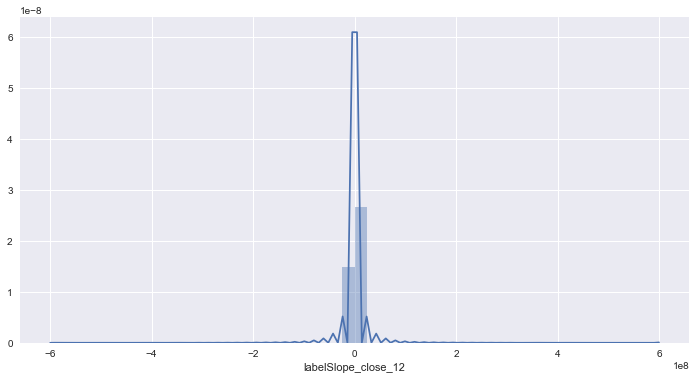

In [58]:
plt.figure(figsize=[12, 6])
label = labeledData['labelSlope_close_12']
sns.distplot(label)